___
# Support Vector Regression
___

## Imports

In [2]:
# data analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ploting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

# data preprocesing
from sklearn.preprocessing import Imputer #replace missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #encoding categorical data
from sklearn.preprocessing import StandardScaler #feature scaling

#spliting data
from sklearn.model_selection import train_test_split

# models
from sklearn.svm import SVR

# metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

## Exploring the Dataset

In [3]:
dataset = pd.read_csv("Position_Salaries.csv")

In [4]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [6]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


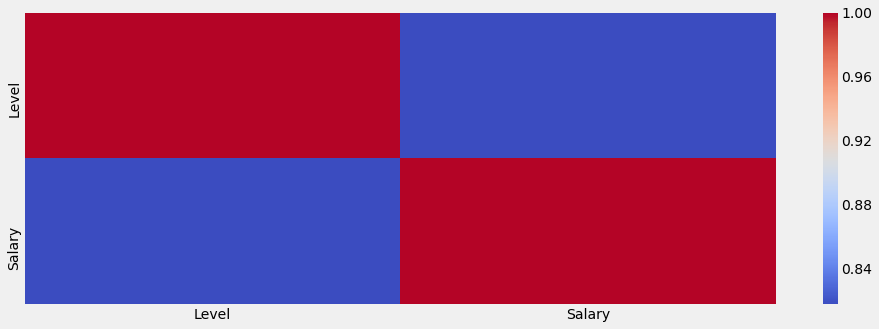

In [7]:
sns.heatmap(dataset.corr(), cmap="coolwarm")

## Dataprocesing

In [8]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

### Featuring Scaling

In [9]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Creating and Training the model

In [10]:
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Perfomance

In [11]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

def plot_performance(X, y, regressor, model_name):
    plt.scatter(X, y, color = 'red')
    y_predict = regressor.predict(X)
    plt.plot(X, y_predict, color = 'blue')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    score = performance_metric(y,  y_predict)
    print ("\nThe " + model_name +" model R^2, is {:.3f}.".format(score))
    plt.title("The " + model_name +" model R^2, is {:.3f}.".format(score))
    plt.show()


The SVR model R^2, is 0.752.


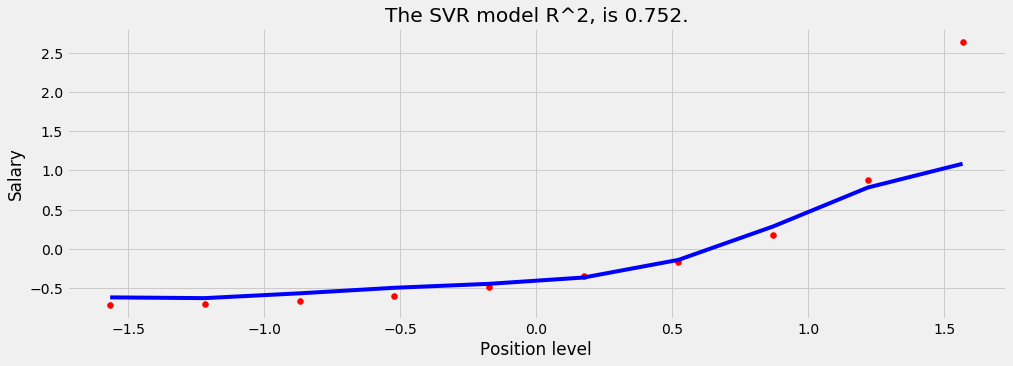

In [12]:
plot_performance(X,y,regressor,"SVR")

In [19]:
arr= np.array([[6.5]])
scaled_value = scaler_X.transform(arr)
not_scaled_predict = regressor.predict(scaled_value)
scaler_y.inverse_transform(not_scaled_predict)[0]

170370.02040650236